In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('supermarket.csv',parse_dates=['Date'],index_col='Date')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
tax=df['Tax 5%'].sum()
withouttax=df['cogs'].sum()
withtax=df['Total'].sum()

In [13]:
print(tax)
print(withouttax)
print(withtax)

15379.368999999999
307587.38
322966.74899999995


In [ ]:
sns.countplot(x='Tax 5%',hue='cogs',data=df)

in which city person highly bought our shop product?

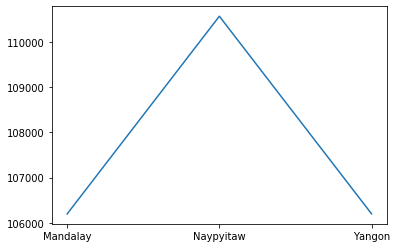

In [121]:
result=df.groupby(df['City']).sum()
city=[City for City,df in df.groupby(df['City'])]
plt.plot(city,result['Total'])
plt.show()

In [4]:
def get_hour(hour):
    return hour.split(':')[0]
def get_min(min):
    return min.split(':')[1]
df['Hour']=df['Time'].apply(lambda x:get_hour(x))
df['Minutes']=df['Time'].apply(lambda x:get_min(x))
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Minutes
Date,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,08
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,10,29
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,23
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,33
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,37


In [110]:
df.groupby(df['Hour']).count()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Minutes
Hour,,,,,,,,,,,,,,,,,,
10,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
11,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
12,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
13,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
14,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
15,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
16,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
17,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
18,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93


in what highly sold the products?

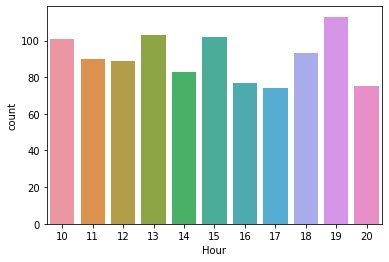

In [114]:
sns.countplot(x='Hour',data=df)

what type of payment method is highlt like

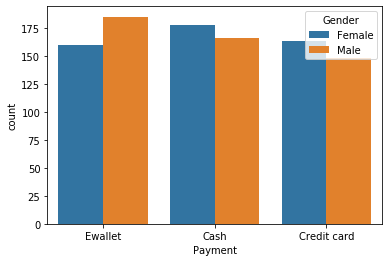

In [96]:
sns.countplot(x='Payment',hue='Gender',data=df)

In [92]:
df.groupby('Payment').count()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Payment,,,,,,,,,,,,,,,
Cash,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344
Credit card,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311
Ewallet,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345


In [89]:
g=df.groupby('Product line').sum()
g.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0


in which gender buy what type of product

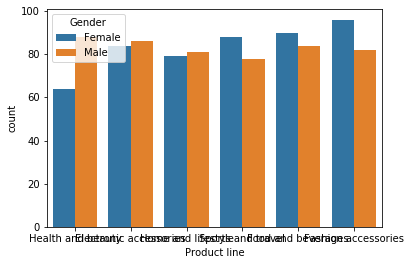

In [82]:
sns.countplot(x='Product line',orient='vertical',hue='Gender',data=df)
fig_size=(20,16)

what time the product was highly sale?

In [ ]:
what time the product was highly sale

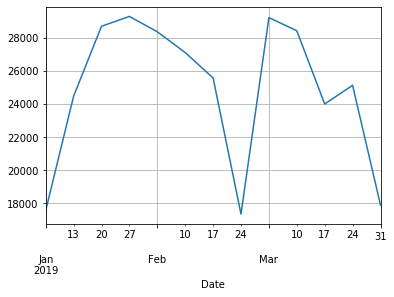

In [53]:
%matplotlib inline
df.Total.resample('W').sum().plot()
plt.grid()
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null datetime64[ns]
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(8)
memor

In [11]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

IN WHICH PRODUCT TO SELL HIGH

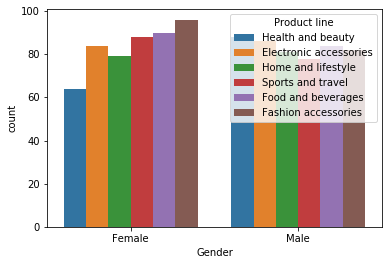

In [15]:
sns.countplot(x='Gender',hue='Product line',data=df)

In [27]:
df['Date']=pd.to_datetime(Date)

NameError: name 'Date' is not defined